# Analysis of RTO data

In [2]:
from nbimports import *

In [3]:
import processing
processing = reload(processing)

In [4]:
# filename = "../data/user/data_04052022_143527.csv"
# filename = "../data/user/data_04052022_170752.csv"
# filename = "../data/user/data_05052022_182742.csv"
filename = "../data/user/data_09052022_162702.csv"

## all strokes

In [5]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [6]:
data.iloc[3282:3285]

,source,data
3282,/data,"{""sample_key"":""2143702_1170"",""timestamp0"":2143..."
3283,/data,"{""sample_key"":""2143715_1180"",""timestamp0"":2143..."
3284,/data,"{""sample_key"":""2143715_1190"",""timestamp0"":2143..."


In [7]:
data_df = utils.format_from_df(data)

In [8]:
data_df.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,2111372_50,2111372,0.000000,50,52,0,0.406541,0.649036,0.020710,0.001576,...,0.000597,0.000039,0.000044,-0.000030,0.000015,0.000017,-7.040439e-06,0.002228,0.841868,0.0
1,2111372_60,2111372,0.000000,60,52,0,0.406850,0.649349,0.020881,0.001885,...,0.000767,0.000109,0.000122,-0.000041,0.000035,0.000039,-6.907139e-06,0.005262,0.838496,0.0
2,2111385_70,2111385,0.000116,70,52,0,0.409435,0.650679,0.019808,0.004470,...,-0.000306,0.000243,0.000270,-0.000030,0.000071,0.000077,-5.998786e-07,0.010485,0.831624,0.0
3,2111398_80,2111398,0.000232,80,52,0,0.413690,0.652632,0.017885,0.008724,...,-0.002229,0.000466,0.000508,0.000018,0.000126,0.000134,1.362055e-05,0.018392,0.816366,0.0
4,2111398_90,2111398,0.000232,90,52,0,0.415508,0.653008,0.017535,0.010543,...,-0.002579,0.000806,0.000847,0.000099,0.000208,0.000209,3.164037e-05,0.029493,0.786592,0.0


<AxesSubplot:>

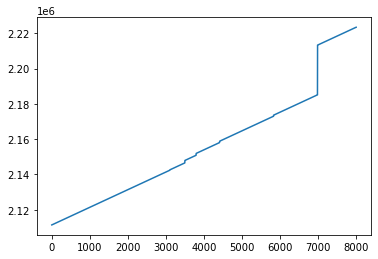

In [9]:
# data['timestamp'].plot()
data_df['t0'].plot()

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

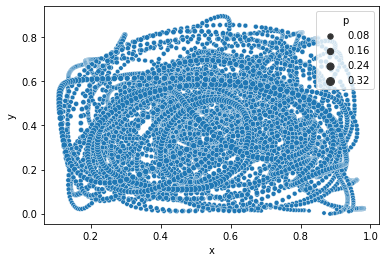

In [11]:
sns.scatterplot(data=data_df, x='x', y='y', size='p')

In [12]:
stroke_id_list = list(set(data_df['stroke_id']))
min(stroke_id_list), max(stroke_id_list)

(52, 58)

<AxesSubplot:xlabel='x', ylabel='y'>

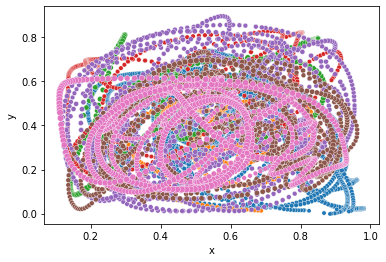

In [13]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [14]:
data.shape

(8174, 2)

<AxesSubplot:>

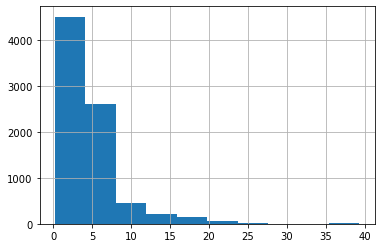

In [15]:
(data_df['p']*100).hist()

In [16]:
tmp = data_df.groupby('stroke_id').apply(lambda x: list(set(x['segment_id'])))

In [17]:
tmp

stroke_id
52    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
53         [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
54                     [76, 77, 78, 79, 80, 81, 82, 83]
55    [96, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 9...
56    [96, 97, 98, 99, 100, 101, 102, 103, 104, 105,...
57    [128, 129, 130, 131, 132, 133, 134, 135, 136, ...
58    [150, 151, 152, 153, 154, 155, 156, 157, 158, ...
dtype: object

In [18]:
stroke_segment_map = {}
segment_stroke_map = {}
for i, row in tmp.iteritems():
    stroke_segment_map[i] = row
    for segment in row:
        segment_stroke_map[segment] = i

In [19]:
row

[150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169]

In [20]:
segment_stroke_map[89]

55

In [21]:
# set(data_df['segment_id'])

## features

<AxesSubplot:>

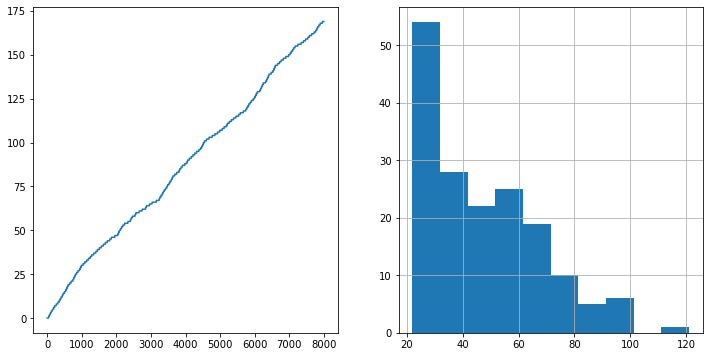

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['segment_id'].plot(ax=ax[0])
data_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

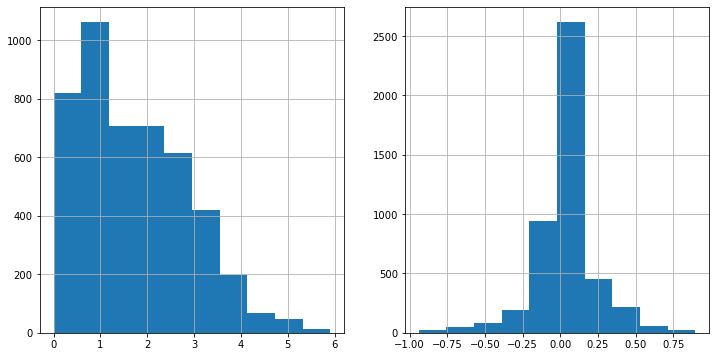

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['s'].hist(ax=ax[0])
data_df['da'].hist(ax=ax[1])

## one stroke

In [78]:
stroke_i = select(data_df, stroke_id=33)

In [79]:
stroke_i.head()

,key,t0,ts,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,413029_50,413029,50,33,0,0.223129,0.892393,0.027828,-0.008367,0.009580,0.026180,-0.000062,0.000080,0.001497,-0.000027,0.000035,0.000484,0.004416,2.235980,0.0
1,413042_60,413042,60,33,0,0.219116,0.895468,0.029969,-0.012380,0.012655,0.028322,-0.000208,0.000265,0.003351,-0.000078,0.000098,0.000962,0.012584,2.243951,0.0
2,413063_70,413063,70,33,0,0.215337,0.897837,0.030219,-0.016160,0.015025,0.028571,-0.000574,0.000717,0.006316,-0.000191,0.000233,0.001650,0.030109,2.257383,0.0
3,413063_80,413063,80,33,0,0.212147,0.899261,0.029894,-0.019350,0.016449,0.028247,-0.001337,0.001617,0.010371,-0.000400,0.000471,0.002486,0.061832,2.275308,0.0
4,413076_90,413076,90,33,0,0.208289,0.900919,0.029537,-0.023208,0.018106,0.027889,-0.002689,0.003123,0.015187,-0.000738,0.000831,0.003334,0.111127,2.297329,0.0


<AxesSubplot:xlabel='ts', ylabel='s'>

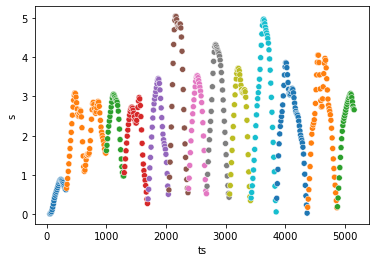

In [80]:
sns.scatterplot(data=stroke_i, x='ts', y='s', hue='segment_id', palette='tab10', legend=False)

## check closest neighbours

This has been removed temporarily.

In [81]:
# min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
# min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

# plt.plot(min_dtw_id)

# plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [82]:
# filename = "../data/user/data_25042022_170416.csv"

In [83]:
gi = data_df.groupby('segment_id').get_group(33)

<AxesSubplot:>

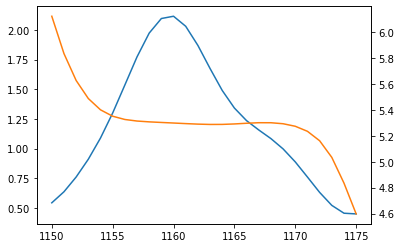

In [84]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['angle'].plot(ax=axt, c=tab10[1])

In [55]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [56]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

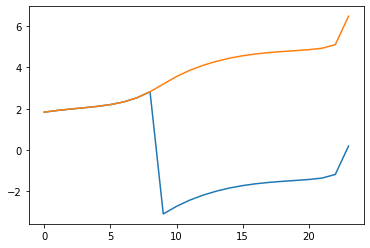

In [57]:
plt.plot(alpha.values)
plt.plot(np.unwrap(alpha))

In [58]:
alpha = alpha.values

The angle computed from atan2 is prone to phase wrapping. The function below is meant to emulate the behaviour of np.unwrap in a stream manner.
This is implemented in the MAX/MSP app in javascript.

In [59]:
def unwrap(x_arr):
    global last, acc
    last = 0
    acc = 0
    def unwrap_(x, period=np.pi):
        global last, acc
        # print(x, last, acc)
        diff = x+acc - last
        if np.abs(diff) > period:
            if diff < 0:
                acc += 2*period
            if diff > 0:
                acc -= 2*period
        x += acc
        last = x

        return x
    res = []
    for x in x_arr:
        res.append(unwrap_(x))
    
    return np.array(res)

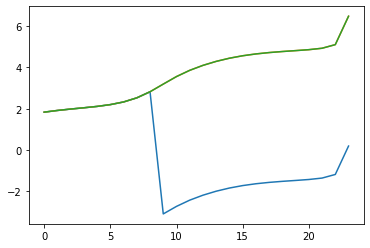

In [60]:
plt.plot(alpha)
plt.plot(np.unwrap(alpha))
plt.plot(unwrap(alpha))